In [0]:
## Import training_images.npz, testing_images.npz and examples.npz into the file
!wget "http://users.sussex.ac.uk/~is321/training_images.npz" -O training_images.npz
!wget "http://users.sussex.ac.uk/~is321/test_images.npz" -O test_images.npz
!wget "http://users.sussex.ac.uk/~is321/examples.npz" -O examples.npz

--2020-05-27 22:56:30--  http://users.sussex.ac.uk/~is321/training_images.npz
Resolving users.sussex.ac.uk (users.sussex.ac.uk)... 139.184.14.119
Connecting to users.sussex.ac.uk (users.sussex.ac.uk)|139.184.14.119|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375302693 (358M)
Saving to: ‘training_images.npz’

training_images.npz 100%[===================>] 357.92M  72.4MB/s    in 5.2s    

2020-05-27 22:56:36 (69.0 MB/s) - ‘training_images.npz’ saved [375302693/375302693]

--2020-05-27 22:56:37--  http://users.sussex.ac.uk/~is321/test_images.npz
Resolving users.sussex.ac.uk (users.sussex.ac.uk)... 139.184.14.119
Connecting to users.sussex.ac.uk (users.sussex.ac.uk)|139.184.14.119|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74915629 (71M)
Saving to: ‘test_images.npz’

test_images.npz     100%[===================>]  71.44M  60.8MB/s    in 1.2s    

2020-05-27 22:56:38 (60.8 MB/s) - ‘test_images.npz’ saved [74915629/74915629]

--2020

In [0]:
import numpy as np
from skimage.color import rgb2gray

## Pre-processing on training data for Model 2 to be used for Graphical Effect

# Load data from training_images.npz
data = np.load('training_images.npz',allow_pickle=True)

# Stores the images from data in variable to represent training images
trainImages = data['images']

# Use rgb2gray function from skimage.color library to change image to grayscale
trainImages = rgb2gray(trainImages)

# Stores the points from data into variable for training points
pts = data['points']

for i in range(2811):
    for j in range(68):
        for k in range(2):
            # Check for any coordinates out of range
            # Change any coordinates above limit to 250
            if(pts[i][j][k] > 250):
                pts[i][j][k] = 250
            # Change any coordinates below limit to 0
            if(pts[i][j][k] < 0):
                pts[i][j][k] = 0
            # Change all coordinate values to be between -1 and 1
            pts[i][j][k] = pts[i][j][k] - 125
            pts[i][j][k] = pts[i][j][k] / 125

# Set both images and points to type float32
trainImages = trainImages.astype(np.float32)        
pts = pts.astype(np.float32)

# Reshape both images and pts to suitable sizes
trainImages = trainImages.reshape(2811, 250, 250 ,1)
pts = pts.reshape(2811, 136)

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Flatten, Dropout
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from ipykernel import kernelapp as app

## Model 2

# Define new model using Sequential from Keras models
model2 = Sequential([
        # Added input layer, this layer is a 2D convolution layer from Keras Layers 
        # Set the dimensionality of the output space to 64
        # Set the size of the 2D convolution window to 3x3            
        Conv2D(64,(3, 3), input_shape = (250,250,1)),
        # Added an activation layer from Keras Layers
        # Applies an Activation function, doesn't affect output shape     
        Activation('relu'),
        # Added layer to perfrom max pooling operation for 2D spatial data
        # Window size set to 2x2
        MaxPooling2D(pool_size = (2,2)),
        # Added 2D convolution layer
        # Set the dimensionality of the output space to 128
        # Set the size of the 2D convolution window to 2x2  
        Conv2D(128,(2,2)),
        # Added another Activation layer
        Activation('relu'),
        # Added layer to perfrom max pooling operation for 2D spatial data
        # Window size set to 2x2
        MaxPooling2D(pool_size = (2,2)),
        # Added 2D convolution layer
        # Set the dimensionality of the output space to 256
        # Set the size of the 2D convolution window to 2x2  
        Conv2D(256,(2,2)),
        # Added another Activation layer
        Activation('relu'),
        # Added layer to perfrom max pooling operation for 2D spatial data
        # Window size set to 2x2
        MaxPooling2D(pool_size=(2,2)),
        # Added Flatten layer
        # Changes output size from (a,b,c) to (d) where d = a x b x c
        Flatten(),
        # Added Dense layer with output shape 500
        Dense(500),
        # Added another Activation layer
        Activation('relu'),
        # Added Dense layer with output shape 500
        Dense(500),
        # Added another Activation layer
        Activation('relu'),
        # Added another Dense Layer as the output layer, this time with output shape 136
        # This is the format needed as it represents the number of coordinates of points per image (68*2)
        Dense(136)
    ])

# Define new Stochastic Gradient Descent which will be used for the required optimizer in compiling the model
sgd = SGD(lr=0.01,momentum = 0.9,nesterov=True)
# Compiles the model using a mean squared error for loss and optimizer defined above
model2.compile(loss="mean_squared_error",optimizer=sgd)

Using TensorFlow backend.


In [0]:
## Train the model on the training images and points
model2.fit(trainImages,pts,nb_epoch=250,validation_split=0.2,verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 2248 samples, validate on 563 samples
Epoch 1/250
2248/2248 [==============================] - 20s 9ms/step - loss: 0.0404 - val_loss: 0.0091
Epoch 2/250
2248/2248 [==============================] - 12s 5ms/step - loss: 0.0084 - val_loss: 0.0080
Epoch 3/250
2248/2248 [==============================] - 12s 5ms/step - loss: 0.0078 - val_loss: 0.0075
Epoch 4/250
2248/2248 [==============================] - 12s 5ms/step - loss: 0.0074 - val_loss: 0.0072
Epoch 5/250
2248/2248 [==============================] - 12s 5ms/step - loss: 0.0072 - val_loss: 0.0070
Epoch 6/250
2248/2248 [==============================] - 12s 5ms/step - loss: 0.0071 - val_loss: 0.0069
Epoch 7/250
2248/2248 [==============================] - 12s 5ms/step - loss: 0.0070 - val_loss: 0.0068
Epoch 8/250
2248/2248 [==============================] - 12s 5ms/step - loss: 0.0070 - val_loss: 0.0068
Epoch 9/250
2248/2248 [==============================] - 12s 5ms/step - loss: 0.0069 - val_loss: 0.0068
Epoch 10/250
2248

In [0]:
## Pre-processing of testing data

# Import testing data from file
test = np.load('test_images.npz',allow_pickle=True)

# Store testing images in a variable
testImages = test['images']

# Set images to grayscale
testImages = rgb2gray(testImages)

# Set images to datatype float32
testImages = testImages.astype(np.float32)

# Reshape images to suitable size
testImages = testImages.reshape(554,250,250,1)

In [0]:
## Use model to predict points on testing images
predictedPts = model2.predict(testImages)

# Post processing of points for use of graphical effect
predictedPts = predictedPts * 125
predictedPts = predictedPts + 125

In [0]:
import matplotlib.pyplot as plt

## Function to plot a sequence of three sequential images
# Starting point is defined in parameter
# Each image has a graphical effect applied to it (face mask)
def plotImages(start):

  # Sets up the features of each figure
  fig = plt.figure(figsize=(12, 12))
  fig.subplots_adjust(hspace=0.10,wspace=0.0001,
                    left=0,right=1,bottom=0, top=1)

  # j represents the position in the plotted structure for a given image
  j = 1

  # Loops from the passed position and the two sequential positions in testing images
  for i in range(start,start+3):

    # Sets up a new subplot for next image, in position j
    ax = fig.add_subplot(3 , 3, j,xticks=[],yticks=[])  

    # Setup test image into correct shape and add to figure
    ax.imshow(testImages[i].reshape(250,250),cmap="gray")

    # Setup a list of all the calculated position on the face for the face mask
    # I have chosen positions that will form a suitable shape of a face mask
    coordinates = [[predictedPts[i][0],predictedPts[i][1]], [predictedPts[i][6],predictedPts[i][7]], [predictedPts[i][12],predictedPts[i][13]], [predictedPts[i][20],predictedPts[i][21]], [predictedPts[i][26],predictedPts[i][27]], [predictedPts[i][32],predictedPts[i][33]],[predictedPts[i][58],predictedPts[i][59]]]
    
    # Adds the first coordinate onto end of the array to make a complete shape
    coordinates.append(coordinates[0]) 
    
    # Zips the coordinates together for use in display
    x, y = zip(*coordinates)

    # Plot the polygon using the coordinates, make the outline black
    ax.plot(x, y, color='black')

    # Fill the polygon with an aqua blue to make it look more like a face mask
    ax.fill_between(x, y, facecolor = "aqua")

    # Increment j
    j += 1

  # Display figures
  plt.show()

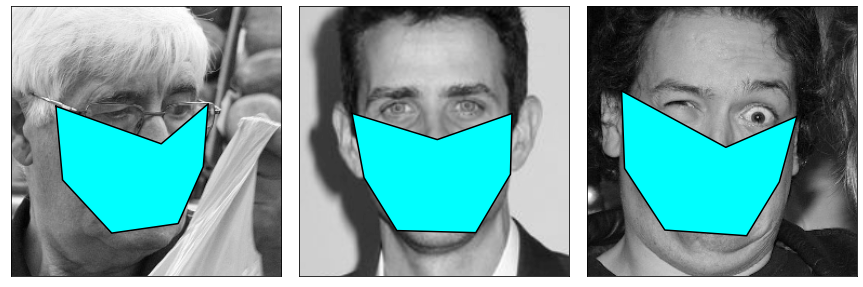

In [0]:
## Call to plotImages to display 3 images with graphical face mask applied
plotImages(200)

In [0]:
## Pre-processing of example images
# Load data from file
example = np.load('examples.npz',allow_pickle=True)

# Extract images from data
exampleImages = example['images']

# Change images to grayscale
exampleImages = rgb2gray(exampleImages)

# Reshape image for use in model
exampleImages = exampleImages.reshape(-1,250,250,1)

# Use model to predict points on example images
predictedPts2 = model2.predict(exampleImages)

# Reshape points to be between 0-250 for graphical effect
predictedPts2 = predictedPts2 * 125
predictedPts2 = predictedPts2 + 125

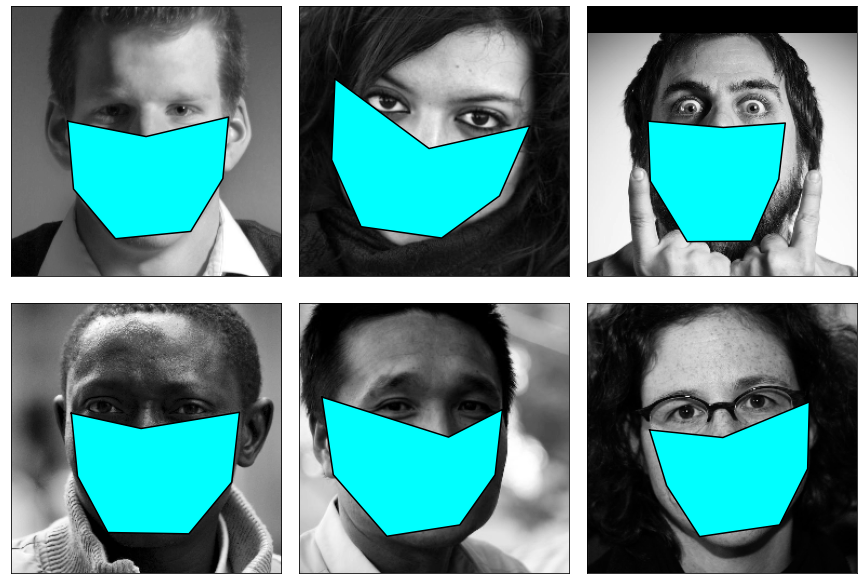

In [0]:
# Sets up the features of each figure
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(hspace=0.10,wspace=0.0001,
                    left=0,right=1,bottom=0, top=1)

# j represents the position in the plotted structure for a given image
j = 1

# Loops from the passed position and the two sequential positions in testing images
for i in range(6):

    # Sets up a new subplot for next image, in position j
    ax = fig.add_subplot(3 , 3, j,xticks=[],yticks=[])  

    # Setup test image into correct shape and add to figure
    ax.imshow(exampleImages[i].reshape(250,250),cmap="gray")

    # Setup a list of all the calculated position on the face for the face mask
    # I have chosen positions that will form a suitable shape of a face mask
    coordinates = [[predictedPts2[i][0],predictedPts2[i][1]], [predictedPts2[i][6],predictedPts2[i][7]], [predictedPts2[i][12],predictedPts2[i][13]], [predictedPts2[i][20],predictedPts2[i][21]], [predictedPts2[i][26],predictedPts2[i][27]], [predictedPts2[i][32],predictedPts2[i][33]],[predictedPts2[i][58],predictedPts2[i][59]]]
    
    # Adds the first coordinate onto end of the array to make a complete shape
    coordinates.append(coordinates[0]) 
    
    # Zips the coordinates together for use in display
    x, y = zip(*coordinates)

    # Plot the polygon using the coordinates, make the outline black
    ax.plot(x, y, color='black')

    # Fill the polygon with an aqua blue to make it look more like a face mask
    ax.fill_between(x, y, facecolor = "aqua")

    # Increment j
    j += 1

# Display figures
plt.show()